In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from scipy.linalg import circulant
# for animation: credit notes of Nick Charlton, Jake Vanderplas, Louis Tiao

# Epicycles, epicycloids, hypocycloids, ...

<b>Important note:</b> <i>Unlike the other learning modules in M340L-EE, this module <b>requires</b> a working installation of $\texttt{ffmpeg}$ to run correctly in Jupyter. There will be relatively little expository material in this module since the videos are expected to speak for themselves.</i>

## Hypocycloids 

A <b>hypocycloid</b> is the figure traced by a fixed point of a circle which rolls without slipping along the interior boundary of another circle. We will take the outer circle to be a unit circle. A very simple example of a hypocycloid is a line segment, as seen below:

In [2]:
%%capture
fig = plt.figure();
fig.set_dpi(100);
fig.set_size_inches(7,7);
ax = plt.axes(xlim=(-1.2,1.2),ylim=(-1.2,1.2));
patch = plt.Circle((0,0),1,fc='none',ec='k',animated=True);
patch2 = plt.Circle((.5,0),0.5,fc='none',ec='k',animated=True);
patch3 = plt.Polygon([[-1,0],[1,0]],closed=False,fc='none',ec='0.75');
patch4 = plt.Circle((1,0),0.02,fc='k',ec='k',animated=True);
patch7 = plt.Polygon(np.array([[1,0],[1,0],[1,0]]),
                     closed=False,fc='none',ec='k');

def animate(i):
    patch.center = (0, 0)
    x, y = patch2.center
    x = .5 * np.cos(np.radians(i))
    y = .5 * np.sin(np.radians(i))
    patch2.center = (x, y)
    x, y = patch4.center
    x = np.cos(np.radians(i))
    y = 0
    patch4.center = (x,y)
    xy = patch7.get_xy()
    xy = np.vstack((xy,np.array([x,y])))
    patch7.set_xy(xy)
    return [patch,patch2,patch3,patch4,patch7]
def init():
    patch.center = (0,0)
    patch2.center = (.5,0)
    patch4.center = (1,0)
    ax.add_patch(patch)
    ax.add_patch(patch2)
    ax.add_patch(patch3)
    ax.add_patch(patch4)
    ax.add_patch(patch7)
    return [patch,patch2,patch3,patch4,patch7]
anim = animation.FuncAnimation(fig,animate,
            init_func=init,frames=360,interval=20,blit=True);

In [3]:
HTML(anim.to_html5_video())

A slightly more complicated example of a hypocycloid is the <b>astroid</b>, which has four points of contact between the figure and the outer (unit) circle:

In [4]:
%%capture
fig = plt.figure();
fig.set_dpi(100);
fig.set_size_inches(7,7);
ax = plt.axes(xlim=(-1.2,1.2),ylim=(-1.2,1.2));
patch = plt.Circle((0,0),1,fc='none',ec='k',animated=True);
patch2 = plt.Circle((.75,0),0.25,fc='none',ec='k',animated=True);
patch4 = plt.Circle((1,0),0.02,fc='k',ec='k',animated=True);
patch7 = plt.Polygon(np.array([[1,0],[1,0],[1,0]]),
                     closed=False,fc='none',ec='k');

# construct an astroid
Z0 = np.zeros([500,2])
Z0[:,0] = np.linspace(-0.9999,0.9999,500)
Z0[:,1] = np.power( np.abs( np.power(np.abs(Z0[:,0]),0.66666)-1) , 1.5 )
Z1 = np.zeros([500,2])
Z1[:,0] = Z0[:,0]
Z1[:,1] = (-1)*Z0[:,1]
patch5 = plt.Polygon(Z0,closed=False,fc='none',ec='0.75');
patch6 = plt.Polygon(Z1,closed=False,fc='none',ec='0.75');


def animate(i):
    patch.center = (0, 0)
    x, y = patch2.center
    x = .75 * np.cos(np.radians(i))
    y = .75 * np.sin(np.radians(i))
    patch2.center = (x, y)
    x, y = patch4.center
    x = 0.75 * np.cos(np.radians(i)) + 0.25 * np.cos(np.radians(3*i))
    y = 0.75 * np.sin(np.radians(i)) - 0.25 * np.sin(np.radians(3*i))
    patch4.center = (x,y)
    xy = patch7.get_xy()
    xy = np.vstack((xy,np.array([x,y])))
    patch7.set_xy(xy)
    return [patch,patch2,patch4,patch5,patch6,patch7]
def init():
    patch.center = (0,0)
    patch2.center = (.75,0)
    patch4.center = (1,0)
    ax.add_patch(patch)
    ax.add_patch(patch2)
    ax.add_patch(patch4)
    ax.add_patch(patch5)
    ax.add_patch(patch6)
    ax.add_patch(patch7)
    return [patch,patch2,patch4,patch5,patch6,patch7]
anim = animation.FuncAnimation(fig,animate,
            init_func=init,frames=360,interval=20,blit=True);

In [5]:
HTML(anim.to_html5_video())

## Epicycloids

An <b>epicycloid</b> is the figure traced by a fixed point of one circle which rolls without slipping along the <i>exterior</i> boundary of another (fixed) circle. Next we plot a cardioid, which is a very simple example of an epicycloid:

In [6]:
%%capture
fig = plt.figure();
fig.set_dpi(100);
fig.set_size_inches(7,7);
ax = plt.axes(xlim=(-3.5,3.5),ylim=(-3.5,3.5));
patch = plt.Circle((0,0),1,fc='none',ec='k',animated=True);
patch2 = plt.Circle((2,0),1,fc='none',ec='k',animated=True);
patch4 = plt.Circle((1,0),0.05,fc='k',ec='k',animated=True);
patch7 = plt.Polygon(np.array([[1,0],[1,0],[1,0]]),
                     closed=False,fc='none',ec='k');

# construct a cardioid
Z0 = np.zeros([500,2])
phi = np.linspace(0,2*np.pi,500)
Z0[:,0] = 2*((-1)*np.cos(phi)+1)*np.cos(phi)+1
Z0[:,1] = 2*((-1)*np.cos(phi)+1)*np.sin(phi)
patch5 = plt.Polygon(Z0,closed=False,fc='none',ec='0.75');

def animate(i):
    patch.center = (0, 0)
    x, y = patch2.center
    x = 2 * np.cos(np.radians(i))
    y = 2 * np.sin(np.radians(i))
    patch2.center = (x, y)
    x, y = patch4.center
    x = 2 * np.cos(np.radians(i)) - np.cos(np.radians(2*i))
    y = 2 * np.sin(np.radians(i)) - np.sin(np.radians(2*i))
    patch4.center = (x,y)
    xy = patch7.get_xy()
    xy = np.vstack((xy,np.array([x,y])))
    patch7.set_xy(xy)
    return [patch,patch2,patch4,patch5,patch7]
def init():
    patch.center = (0,0)
    patch2.center = (.75,0)
    patch4.center = (1,0)
    ax.add_patch(patch)
    ax.add_patch(patch2)
    ax.add_patch(patch4)
    ax.add_patch(patch5)
    ax.add_patch(patch7)
    return [patch,patch2,patch4,patch5,patch7]
anim = animation.FuncAnimation(fig,animate,
            init_func=init,frames=360,interval=20,blit=True);

In [7]:
HTML(anim.to_html5_video())

## Epicycles

All the epicycloids and hypocycloids from above are special cases of <i>epicycles</i>. An <b>epicycle</b> is constructed by letting the <i>center</i> of each circle move uniformly along the perimeter of the previous circle. Epicycles are closely related to Fourier series because the function $e^{i k t}$ traces out a circle in the complex plane, and addition will simply place the center of one circle on the perimeter of the previous one.

In order to understand epicycles concretely, we consider the case of just two circles (though any number is possible). Looking carefully through the Python code construction of the astroid (a hypocycloid), we find the following parametric curve: (look in the $\texttt{animate}$ function)

$$
x ( t ) = \frac{3}{4} \cos t + \frac{1}{4} \cos ( 3t ) \\
y ( t ) = \frac{3}{4} \sin t - \frac{1}{4} \sin ( 3t )
$$

Letting $z=x+iy$, this is equivalent to the following Fourier series with two terms:

$$
z ( t ) = \frac{3}{4} e^{i t} + \frac{1}{4} e^{-3 i t}
$$

Hence, to construct the astroid, we require a circle of radius $\frac{1}{4}$ to orbit with its center living upon a circle of radius $\frac{3}{4}$. (Observe that there is <i>no longer</i> a circle of radius one anywhere in sight!) We obtain the following epicycle, completely equivalent to the astroid we plotted previously:

In [8]:
%%capture
fig = plt.figure();
fig.set_dpi(100);
fig.set_size_inches(7,7);
ax = plt.axes(xlim=(-1.2,1.2),ylim=(-1.2,1.2));
patch = plt.Circle((0,0),0.75,fc='none',ec='k',animated=True);
patch2 = plt.Circle((.75,0),0.25,fc='none',ec='k',animated=True);
patch4 = plt.Circle((1,0),0.02,fc='k',ec='k',animated=True);
patch7 = plt.Polygon(np.array([[1,0],[1,0],[1,0]]),
                     closed=False,fc='none',ec='k');


# construct an astroid
Z0 = np.zeros([500,2])
Z0[:,0] = np.linspace(-0.9999,0.9999,500)
Z0[:,1] = np.power( np.abs( np.power(np.abs(Z0[:,0]),0.66666)-1) , 1.5 )
Z1 = np.zeros([500,2])
Z1[:,0] = Z0[:,0]
Z1[:,1] = (-1)*Z0[:,1]
patch5 = plt.Polygon(Z0,closed=False,fc='none',ec='0.75');
patch6 = plt.Polygon(Z1,closed=False,fc='none',ec='0.75');


def animate(i):
    patch.center = (0, 0)
    x, y = patch2.center
    x = .75 * np.cos(np.radians(i))
    y = .75 * np.sin(np.radians(i))
    patch2.center = (x, y)
    x, y = patch4.center
    x = 0.75 * np.cos(np.radians(i)) + 0.25 * np.cos(np.radians(3*i))
    y = 0.75 * np.sin(np.radians(i)) - 0.25 * np.sin(np.radians(3*i))
    patch4.center = (x,y)
    xy = patch7.get_xy()
    xy = np.vstack((xy,np.array([x,y])))
    patch7.set_xy(xy)
    return [patch,patch2,patch4,patch5,patch6,patch7]
def init():
    patch.center = (0,0)
    patch2.center = (.75,0)
    patch4.center = (1,0)
    ax.add_patch(patch)
    ax.add_patch(patch2)
    ax.add_patch(patch4)
    ax.add_patch(patch5)
    ax.add_patch(patch6)
    ax.add_patch(patch7)
    return [patch,patch2,patch4,patch5,patch6,patch7]
anim = animation.FuncAnimation(fig,animate,
            init_func=init,frames=360,interval=20,blit=True);

In [9]:
HTML(anim.to_html5_video())

<b>Exercise 1:</b> Modify the code in the previous cell to plot an epicyclic representation of the following three-term Fourier series:

$$
z ( t ) = \frac{3}{4} e^{i t} + \frac{1}{4} e^{-3 i t} + \frac{1}{20}
e^{5 i t}
$$

Your answer should produce an animation, one frame of which looks like the following plot:

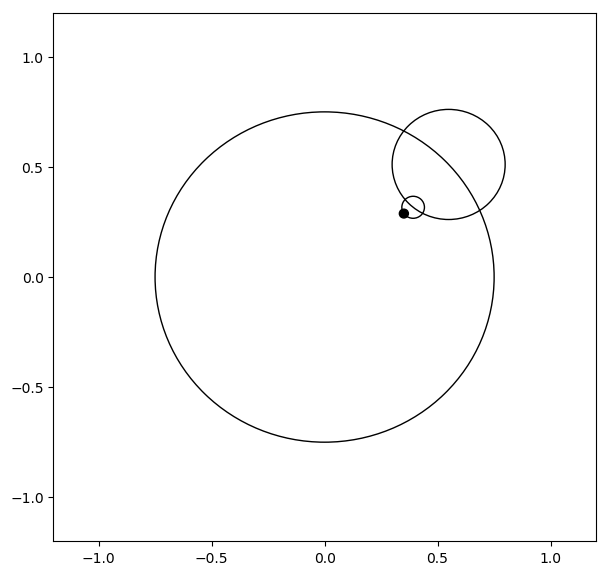

In [10]:
t0 = 0.75
z0 = 0.75*np.exp(1j*t0)
z1 = z0 + 0.25*np.exp(-3j*t0)
z2 = z1 + 0.05*np.exp(5j*t0)

fig = plt.figure();
fig.set_dpi(100);
fig.set_size_inches(7,7);
ax = plt.axes(xlim=(-1.2,1.2),ylim=(-1.2,1.2));
patch = plt.Circle((0,0),0.75,fc='none',ec='k');
patch2 = plt.Circle((z0.real,z0.imag),0.25,fc='none',ec='k');
patch3 = plt.Circle((z1.real,z1.imag),0.05,fc='none',ec='k');
patch4 = plt.Circle((z2.real,z2.imag),0.02,fc='k',ec='k');

ax.add_patch(patch)
ax.add_patch(patch2)
ax.add_patch(patch3)
ax.add_patch(patch4)

plt.show()

<b>Exercise 2:</b> <i>(difficult!)</i> Consider the outline of the Statue of Liberty (below). Create a new Jupyter notebook and copy the code from the cell below into the new notebook. Then, working in the new notebook, compute the DFT of the <i>complex</i> version $x+iy$ of the $N \times 2$ matrix $\texttt{libertyZ0interp}$. (The first column is $x$, the second column is $y$.) Extract the largest few Fourier components and use them to construct an epicyclic representation of the Statue of Liberty; the number of circles in your plot will be equal to the number of Fourier modes you require for an accurate reconstruction.

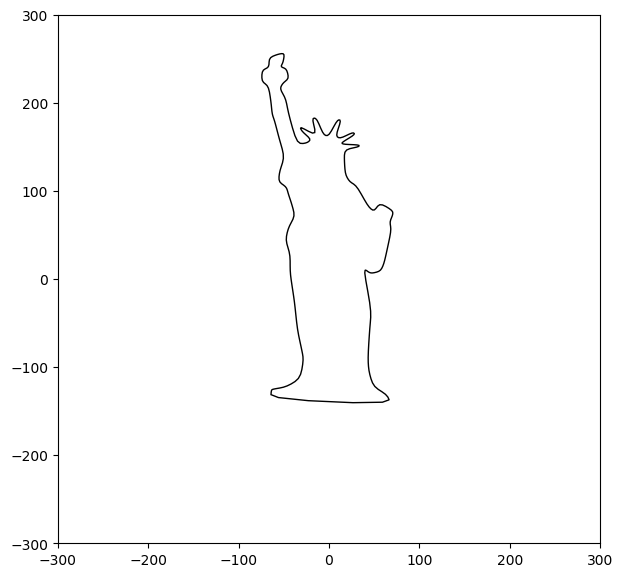

In [11]:
libertyZ0 = np.zeros([85,2])
libertyZ0[:,0] = [68.322,65.322,49.022,44.022,43.022,45.122,47.022,
                  38.022,44.222,48.122,57.022,60.922,64.622,69.022,
                  67.122,70.822,70.322,56.022,49.822,43.022,30.622,
                  22.922,18.022,17.022,17.022,33.022,33.822,14.922,
                  14.022,29.15,26.558,12.222,7.322,13.596,9.448,
                  -0.078,-5.978,-13.678,-19.068,-13.278,-32.548,
                  -30.178,-19.778,-24.178,-35.378,-44.978,-47.778,
                  -54.378,-51.178,-44.378,-46.778,-53.678,-50.778,
                  -48.978,-56.178,-66.378,-66.178,-74.178,-74.378,
                  -66.778,-63.978,-62.878,-60.078,-54.978,-48.978,
                  -54.678,-55.88,-46.978,-45.078,-41.378,-37.578,
                  -44.992,-48.103,-42.778,-43.078,-40.578,-37.978,
                  -34.978,-29.978,-28.078,-31.578,-47.678,-61.978,
                  -63.978,-64.278]
libertyZ0[:,1] = [-143.774,-131.874,-122.274,-104.974,-89.174,
                  -55.374,-35.974,12.626,7.326,6.626,8.926,17.626,
                  34.826,56.026,64.826,73.326,77.826,86.726,76.326,
                  82.726,106.026,110.326,118.626,134.026,147.026,
                  150.026,152.326,152.926,155.026,164.202,166.795,
                  159.226,162.526,180.275,181.312,162.526,163.026,
                  182.826,182.868,162.026,173.535,167.826,158.626,
                  154.326,153.126,188.526,204.926,215.926,222.326,
                  227.626,238.726,240.826,245.626,256.526,255.326,
                  251.326,240.326,237.226,224.026,219.326,200.026,
                  187.126,179.526,159.026,138.526,122.326,110.281,
                  104.626,96.926,85.826,71.526,58.433,43.916,28.026,
                  7.826,-9.474,-26.974,-57.474,-80.974,-91.374,-113.074,
                  -122.674,-124.974,-126.174,-137.574]

tt0 = np.linspace(0,1,85)
tt1 = np.linspace(0,1,301)

libertyZ0interp = np.zeros([301,2])
libertyZ0interp[:,0] = np.interp(tt1,tt0,libertyZ0[:,0])
libertyZ0interp[:,1] = np.interp(tt1,tt0,libertyZ0[:,1])

V = np.zeros(301)
V[0] = 0.25
V[1] = 0.5
V[2] = 0.25
C = circulant(V)
libertyZ0interp = C.dot(libertyZ0interp)
libertyZ0interp = C.dot(libertyZ0interp)

fig = plt.figure();
fig.set_dpi(100);
fig.set_size_inches(7,7);
ax = plt.axes(xlim=(-300,300),ylim=(-300,300));
libertypatch = plt.Polygon(libertyZ0interp,closed=True,fc='none',ec='k');
ax.add_patch(libertypatch)
plt.show()